In [66]:
import sys
import numpy
import matplotlib
import pandas
import sklearn



In [67]:
from pandas.plotting import scatter_matrix
import pandas

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [68]:
 url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
 names=['sapel-length','sepal-width','petal-length','petal-width','class']
 dataset=pandas.read_csv(url,names=names)

In [69]:
print(dataset.shape)

(150, 5)


In [70]:
print (dataset.head(40))

    sapel-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [71]:
print(dataset.describe)

<bound method NDFrame.describe of      sapel-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


In [72]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

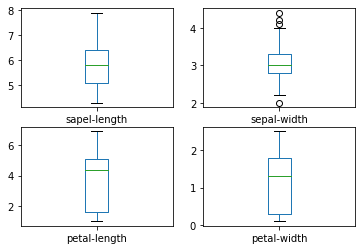

In [73]:
dataset.plot(kind='box', subplots=True, layout=(2,2),sharex=False,sharey=False)
plt.show

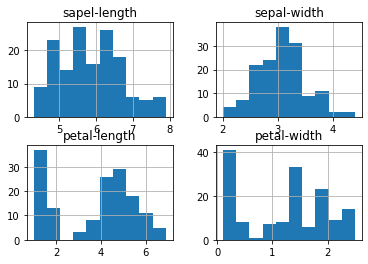

In [74]:
dataset.hist()
plt.show()

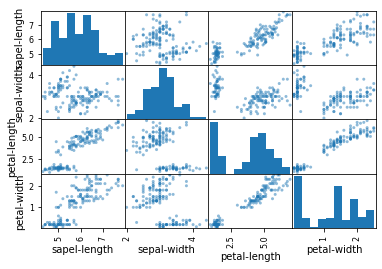

In [75]:
scatter_matrix(dataset)
plt.show()

In [76]:
array=dataset.values
x=array[:,0:4:]
y=array[:,4]
validation_size=0.20
seed=6
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=validation_size,random_state=seed)

In [77]:
seed=6
scoring='accuracy'


In [78]:
#spot cehck algorithm
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDR',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
results=[]
names=[]
for name ,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring )
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name ,cv_results.mean(),cv_results.std())
    print(msg)


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

LR: 0.950000 (0.076376)
LDR: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.958333 (0.041667)
NB: 0.966667 (0.055277)
SVM: 0.950000 (0.076376)


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is Fals

In [79]:
results=pandas.DataFrame({'Model name':['Logistic Regression','support vector Machines','LinearDiscriminantAnalysis','KNeighborsClassifier','DecisionTreeClassifie','GaussianNB'],'score':[0.950000, 0.950000,0.975000,0.958333,0.958333,0.966667 ]})
result_df=results.sort_values(by='score',ascending=False)
result_df=result_df.set_index('score')
result_df.head(20)

,Model name
score,
0.975000,LinearDiscriminantAnalysis
0.966667,GaussianNB
0.958333,KNeighborsClassifier
0.958333,DecisionTreeClassifie
0.950000,Logistic Regression
0.950000,support vector Machines


In [80]:
print("LinearDisriminantAnalysis is giving high accuracy ")

LinearDisriminantAnalysis is giving high accuracy 


In [81]:
print('successful')

successful
